#### Model Built using NER-Dataset-Train.csv Dataset.

#### Importing the Libraries

In [117]:
import pprint
import numpy as np
import pandas as pd
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

#### Importing the dataset

In [118]:
df = pd.read_csv("NER-Dataset-Train.csv")

#### Preprocessing 

In [119]:
df.head()

,@LewisDixon,O
0,Trust,O
1,me,O
2,!,O
3,im,O
4,gonna,O


In [120]:
df.shape

(18378, 2)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18378 entries, 0 to 18377
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   @LewisDixon  17479 non-null  object
 1   O            17406 non-null  object
dtypes: object(2)
memory usage: 287.3+ KB


In [122]:
df.describe()

,@LewisDixon,O
count,17479,17406
unique,5185,3
top,.,O
freq,548,16434


In [123]:
df.isnull().sum()

@LewisDixon    899
O              972
dtype: int64

In [124]:
sentences_words=[]
sentences_tags=[]
file = open('NER-Dataset-Train.txt', 'r')
lines = file.readlines()
temp_sentence_words=[]
temp_sentence_tags=[]
for line in lines:
    if line=="\n":#Sentences ends at every blank line
        if len(temp_sentence_words)==0:#If zero length sentence is formed, then ignore
            continue
        sentences_words.append(temp_sentence_words)
        temp_sentence_words=[]
        sentences_tags.append(temp_sentence_tags)
        temp_sentence_tags=[]
        continue
    temp=line.split("\t")#splitting to get the tag and the word
    temp[1]=temp[1].split("\n")[0]
    temp_sentence_words.append(temp[0])
    temp_sentence_tags.append(temp[1])
file.close()

In [125]:
sentences_words

[['@LewisDixon',
  'Trust',
  'me',
  '!',
  'im',
  'gonna',
  'be',
  'bringing',
  'out',
  'music',
  'like',
  'theres',
  'no',
  'tomorrow',
  ',',
  'Be',
  'doing',
  'pure',
  'blog',
  'videos',
  '&amp;',
  'freestyle',
  'videos',
  '#Moesh',
  '!'],
 ['@joshHnumber1fan',
  'its',
  'okay',
  'then',
  '..',
  'make',
  'it',
  'when',
  'it',
  'works',
  ':D'],
 ['Asprin',
  ',',
  'check',
  ',',
  'cup',
  'of',
  'tea',
  ',',
  'check',
  ',',
  'pillow',
  ',',
  'check',
  ',',
  'warm',
  'sleeping',
  'bag',
  ',',
  'check',
  ',',
  'fanfiction',
  'on',
  'the',
  'laptop',
  ',',
  'check',
  '.',
  'Time',
  'to',
  'settle',
  'down',
  'and',
  'relax'],
 ['@angelportugues',
  'LMAO',
  '!',
  'When',
  'is',
  'tht',
  'one',
  'day',
  '?:',
  'P'],
 ['The',
  'Basic',
  'Step',
  'Before',
  'You',
  'Even',
  'Start',
  'Thinking',
  'Of',
  'Making',
  'Your',
  '...:',
  'Keyword',
  'research',
  'is',
  'a',
  'well',
  'known',
  'subject',
  ',',

In [126]:
sentences_tags

[['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B',
  'I',
  'I',
  'O',
  'O',
  'O',
  

In [127]:
sum(len(row) for row in sentences_words)
sum(len(row) for row in sentences_tags)
len(sentences_words[0])

25

In [128]:
list5=[]
for i in range(len(sentences_words)):
    list4=[]
    for j in range(len(sentences_words[i])):
        list1=[]
        list1.append(sentences_words[i][j])
        list1.append(sentences_tags[i][j])
        list4.append(tuple(list1))
    list5.append(list4)

In [129]:
len(list5)

900

In [130]:
sum(len(row) for row in list5)

17480

In [131]:
# Splitting into train and test
import random
random.seed(1)
train_set, test_set = train_test_split(list5,test_size=0.30)
print(len(train_set))
print(len(test_set))

630
270


In [203]:
# Getting list of tagged words
Tagged_words = [tup for sent in train_set for tup in sent]
len(Tagged_words)

14042

In [204]:
# Word_Token 
Word_Token = [pair[0] for pair in Tagged_words]
print(len(Word_Token))

14042


In [205]:
# vocabulary
V = set(Word_Token)
print(len(V))

4395


In [206]:
# number of tags
T = set([pair[1] for pair in Tagged_words])
print(len(T))
T

3


{'B', 'I', 'O'}

#### Emission Probabilities  P(w/t)

In [133]:
#Calculating P(w/t) 
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

#Calculating  Probability of a word given a tag: Emission Probability
def prob_of_word_given_tag(word, tag, train_bag = Tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

#### Transition Probabilities  P(t2/t1)

In [134]:
#Calculating the Probability of a tag given a tag: P(t2/t1) i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = Tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])      #Counting number of occurences of t1
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2: #Counting number of times t2 follows t1
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

#### Transition matrix : Containing Probabilities of Transition From Tag1 to Tag2

In [135]:
# We will now create a Transition matrix of tags of dimension t x t
# Considering each column t2 and each row as t1
#Thus element M(i, j) is equivalent to Probability of tj given ti : P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [136]:
tags_matrix

array([[0.9639577 , 0.03595564, 0.        ],
       [0.54196644, 0.        , 0.45803356],
       [0.689781  , 0.00729927, 0.30291972]], dtype=float32)

In [137]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [138]:
tags_df

,O,B,I
O,0.963958,0.035956,0.000000
B,0.541966,0.000000,0.458034
I,0.689781,0.007299,0.302920


In [139]:
tags_df.loc['O', :]

O    0.963958
B    0.035956
I    0.000000
Name: O, dtype: float32

#### Visualizing the Transition Matrix on Heat Map for better intuition

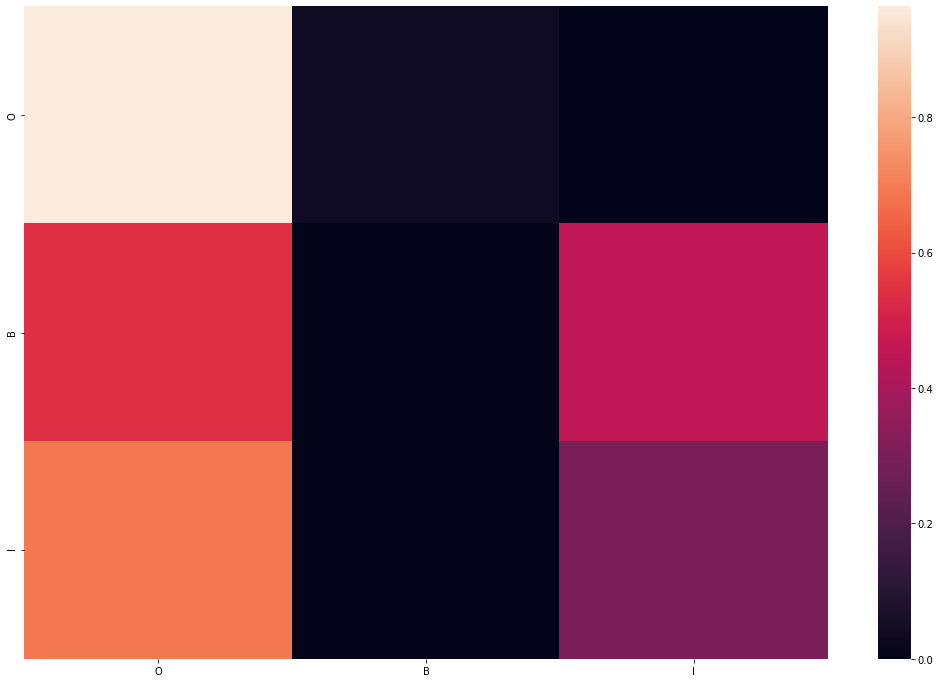

In [140]:
# Heatmap of Tags matrix where T(i, j) = P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

In [141]:
len(train_set)

630

#### Viterbi Algorithm

In [142]:
# Viterbi_Algorithm Function !
def Viterbi_Algorithm(words, train_bag = Tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initializing a list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_probability = tags_df.loc['O', tag]      # P(tag|start) = P(tag|'.')
            else:
                transition_probability = tags_df.loc[state[-1], tag]
                
            #Calculating emission and state probabilities
            emission_probability = prob_of_word_given_tag(words[key], tag)[0]/prob_of_word_given_tag(words[key], tag)[1]
            state_probability = emission_probability * transition_probability    
            p.append(state_probability)
            
        pmax = max(p)
        # Finding the state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating on Test Set

#### Testing

### 5-fold cross validation

In [143]:
num_sents = len(list5)
k = 5
foldsize = int(num_sents/k)
foldsize


180

In [144]:
fold_accurracies = []
fold_incorrect_tags =[]
timetaken=[]
tagged_seq_collection=[]
test_seq_collection=[]
for f in range(5):
    # Locate the test set in the fold.
    test_set = list5[f*foldsize:f*foldsize+foldsize]
    # Use the rest of the sent not in test for training.
    train_set = list5[:f*foldsize] + list5[f*foldsize+foldsize:]
   

    # Getting list of tagged words
    train_tagged_words = [tup for sent in train_set for tup in sent]
    #len(train_tagged_words)

    # tokens 
    tokens = [pair[0] for pair in train_tagged_words]

    # vocabulary
    V = set(tokens)
    # print(len(V))

    # number of tags
    T = set([pair[1] for pair in train_tagged_words])
    #len(T)

    #Calculating P(w/t)
    t = len(T)
    v = len(V)
    w_given_t = np.zeros((t, v))
    
    #Calculating the Probability of a tag given a tag: P(t2/t1) i.e. Transition Probability
    def t2_given_t1(t2, t1, train_bag = train_tagged_words):
        tags = [pair[1] for pair in train_bag]
        count_t1 = len([t for t in tags if t==t1])      #Counting number of occurences of t1
        count_t2_t1 = 0
        for index in range(len(tags)-1):
            if tags[index]==t1 and tags[index+1] == t2: #Counting number of times t2 follows t1
                count_t2_t1 += 1
        return (count_t2_t1, count_t1)

    # We will now create a Transition matrix of tags of dimension t x t
    # Considering each column t2 and each row as t1
    #Thus element M(i, j) is equivalent to Probability of tj given ti : P(tj given ti)

    tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
    for i, t1 in enumerate(list(T)):
        for j, t2 in enumerate(list(T)): 
            tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

    tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
    
    # Running the Viterbi algorithm on a few sample sentences

    random.seed(1)

    # choose random 5 sents
    #rndom = [random.randint(1,len(test_set)) for x in range(5)]

    # list of sents
    #test_run = [test_set[i] for i in rndom]

    # list of tagged words
    test_run_base = [tup for sent in test_set for tup in sent]

    # list of untagged words
    test_tagged_words = [tup[0] for sent in test_set for tup in sent]
    
    #test_run
    # tagging the test sentences
    # tagging the test sentences
    start = time.time()
    tagged_seq = Viterbi_Algorithm(test_tagged_words)
    tagged_seq_collection.append(tagged_seq)
    test_seq_collection.append(test_set)
    end = time.time()
    difference = end-start
    timetaken.append(difference)
   
    # accuracy
    check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]
    accuracy = len(check)/len(tagged_seq)
    fold_accurracies.append(accuracy)
    
    #Incorrect Tagging Tracker
    incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]
    fold_incorrect_tags.append(incorrect_tagged_cases)
   
    
    print("Fold", f)
    print('From ', f*foldsize, 'to', f*foldsize+foldsize)
    print('Accuracy =', accuracy )
    print("Time Taken :",timetaken[f])

Fold 0
From  0 to 180
Accuracy = 0.980672268907563
Time Taken : 83.15905547142029
Fold 1
From  180 to 360
Accuracy = 0.9724822695035461
Time Taken : 88.2626678943634
Fold 2
From  360 to 540
Accuracy = 0.9801691455234762
Time Taken : 82.22799515724182
Fold 3
From  540 to 720
Accuracy = 0.9829448550312677
Time Taken : 115.27482295036316
Fold 4
From  720 to 900
Accuracy = 0.9767306573589296
Time Taken : 76.35195231437683


No handles with labels found to put in legend.


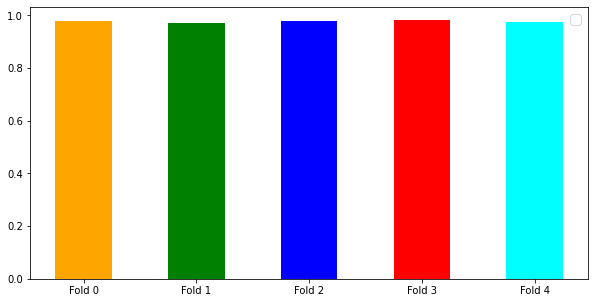

In [145]:
a1=fold_accurracies[0]
a2=fold_accurracies[1]
a3=fold_accurracies[2]
a4=fold_accurracies[3]
a5=fold_accurracies[4]

labels=['Fold 0','Fold 1','Fold 2','Fold 3', 'Fold 4']
f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)
plt.bar(labels, [a1,a2,a3,a4,a5], color=['orange','green','blue', 'red','cyan'],width=0.5)
ax.legend(fontsize = 14)

In [146]:
fold_incorrect_tags

[[[('to', 'O'), (('tumblr', 'O'), ('tumblr', 'B'))],
  [('to', 'O'), (('Nijverdal', 'O'), ('Nijverdal', 'B'))],
  [('with', 'O'), (('the', 'O'), ('the', 'B'))],
  [('the', 'B'), (('Rza', 'O'), ('Rza', 'I'))],
  [('in', 'O'), (('WoW', 'O'), ('WoW', 'B'))],
  [('some', 'O'), (('Jersey', 'O'), ('Jersey', 'B'))],
  [('Jersey', 'B'), (('Shore', 'O'), ('Shore', 'I'))],
  [('http://bit.ly/dflARA', 'O'), (('MetroPCS', 'O'), ('MetroPCS', 'B'))],
  [(':', 'O'), (('A', 'O'), ('A', 'B'))],
  [('A', 'B'), (('Different', 'O'), ('Different', 'I'))],
  [('Different', 'I'), (('Kind', 'O'), ('Kind', 'I'))],
  [('Kind', 'I'), (('Of', 'O'), ('Of', 'I'))],
  [('Of', 'I'), (('Ache', 'O'), ('Ache', 'I'))],
  [('Gaye', 'I'), (('Day', 'I'), ('Day', 'O'))],
  [('birthday', 'O'), (('florence', 'O'), ('florence', 'B'))],
  [('N', 'I'), (('.', 'O'), ('.', 'I'))],
  [('.', 'I'), (('Parks', 'O'), ('Parks', 'I'))],
  [('N', 'I'), (('.', 'O'), ('.', 'I'))],
  [('.', 'I'), (('Parks', 'O'), ('Parks', 'I'))],
  [('then',

### Maximum Accuracy 

In [147]:
print(max(fold_accurracies))
F=fold_accurracies.index(max(fold_accurracies))
print("Fold ",F)

0.9829448550312677
Fold  3


### Class wise Accuracy

In [148]:
#We will calculate Class wise of Fold with maximum accuracy 

In [149]:
fold_incorrect_tags[F]

[[(',', 'O'), (('joe', 'O'), ('joe', 'B'))],
 [('17-9-2010Tal', 'O'), (('al-Mallohi', 'O'), ('al-Mallohi', 'B'))],
 [('of', 'O'), (('justin', 'B'), ('justin', 'O'))],
 [("http://tinyurl.com/2brsuxs'", 'O'), (('Vanilla', 'O'), ('Vanilla', 'B'))],
 [('Vanilla', 'B'), (('vodka', 'O'), ('vodka', 'I'))],
 [('n', 'O'), (('justthen', 'O'), ('justthen', 'B'))],
 [('about', 'O'), (('kenny', 'O'), ('kenny', 'B'))],
 [('via', 'O'), (('fb', 'O'), ('fb', 'B'))],
 [('in', 'O'), (('Naples', 'O'), ('Naples', 'B'))],
 [('with', 'O'), (('N.E.R.D.', 'O'), ('N.E.R.D.', 'B'))],
 [(',', 'O'), (('Maroon', 'O'), ('Maroon', 'B'))],
 [('Maroon', 'B'), (('5', 'O'), ('5', 'I'))],
 [('the', 'O'), (('MTV', 'O'), ('MTV', 'B'))],
 [('Tonight', 'O'), (('Stars', 'O'), ('Stars', 'B'))],
 [('in', 'O'), (('Vordingborg', 'O'), ('Vordingborg', 'B'))],
 [('text', 'O'), (('Justin', 'B'), ('Justin', 'O'))],
 [('FREE', 'O'), (('PAMPERS', 'O'), ('PAMPERS', 'B'))],
 [('&quot;', 'O'), (('He', 'O'), ('He', 'B'))],
 [('He', 'B'), ((

In [150]:
#Total Incorrect Tagging in the chosen Fold is :
ic=len(fold_incorrect_tags[F])
print("Total Incorrect Tagging in the chosen Fold is :",ic)

Total Incorrect Tagging in the chosen Fold is : 60


In [151]:
length=len((fold_incorrect_tags[F]))
length

60

In [152]:
lista=[]
for i in range(0,length):
    lista.append(((fold_incorrect_tags[F][i])[1])[0])
    

In [153]:
len(lista)

60

In [154]:
#Lista contains the incorrect tags alloted to a word
lista

[('joe', 'O'),
 ('al-Mallohi', 'O'),
 ('justin', 'B'),
 ('Vanilla', 'O'),
 ('vodka', 'O'),
 ('justthen', 'O'),
 ('kenny', 'O'),
 ('fb', 'O'),
 ('Naples', 'O'),
 ('N.E.R.D.', 'O'),
 ('Maroon', 'O'),
 ('5', 'O'),
 ('MTV', 'O'),
 ('Stars', 'O'),
 ('Vordingborg', 'O'),
 ('Justin', 'B'),
 ('PAMPERS', 'O'),
 ('He', 'O'),
 ("'s", 'O'),
 ('Just', 'O'),
 ('A', 'O'),
 ('Boy', 'O'),
 ('you', 'O'),
 ('tube', 'O'),
 ('The', 'O'),
 ('Weekend', 'O'),
 ('Grind', 'O'),
 ('Oh', 'O'),
 ('Canada', 'O'),
 ('Team', 'O'),
 ('Jets', 'O'),
 ('Rex', 'O'),
 ('Ryan', 'O'),
 ('OH', 'B'),
 ('.', 'O'),
 ('Riley', 'O'),
 ('First', 'O'),
 ('Baptist', 'O'),
 ("'s", 'I'),
 ('msn', 'O'),
 ('New', 'O'),
 ('Life', 'O'),
 ('FDA', 'O'),
 ('Margaret', 'O'),
 ('Hamburg', 'O'),
 ('Jorge', 'O'),
 ('The', 'O'),
 ('Devils', 'O'),
 ('Art', 'O'),
 ('Words', 'O'),
 ('and', 'O'),
 ('Wine', 'O'),
 ('Easy', 'B'),
 ('Casitas', 'O'),
 ('Luna', 'O'),
 ('Lounge', 'O'),
 ('git', 'O'),
 ('The', 'O'),
 ('Persuaders', 'O'),
 ('green', 'B')]

In [155]:
#Using lista we are extracting the tags that were incorrectly attached to some word and storing the tags in listb
listb=[]
for i in range(0,len(lista)):
    listb.append((lista[i][1]))

In [156]:
#We will count number of times each tag in listb was incorrectly attached to some word
from collections import Counter
Counter(listb)
dicta=dict(Counter(listb))
print(dicta)

{'O': 54, 'B': 5, 'I': 1}


In [157]:
actual_freq_of_tag=[]
for i in range(0,len(test_seq_collection[F])):
    for j in range(0,len(test_seq_collection[F][i])):
        actual_freq_of_tag.append((test_seq_collection[F][i][j][1]))
    

In [158]:
from collections import Counter
Counter(actual_freq_of_tag)
dictb=dict(Counter(actual_freq_of_tag))
print(dictb)

{'O': 3358, 'B': 107, 'I': 53}


In [207]:
#of times a tag appeared in the dataset
appearance=[]
for i in range(0,len(tagged_seq_collection[F])):
        appearance.append((tagged_seq_collection[F][i][1]))
from collections import Counter
Counter(appearance)
dictappear=dict(Counter(appearance))
print(dictappear)

{'O': 3406, 'B': 80, 'I': 32}


In [208]:
keyList=dictappear.keys()
keyList

dict_keys(['O', 'B', 'I'])

In [209]:
#Creating a dictionary 'd' with all tags that were used through out the process and initializing it to zero
d={}
for i in keyList: 
    d[i] = 0

In [210]:
#With the help of dicta I will insert values in this new dict 'd'. 
for i in dicta.keys(): 
    d[i] = dicta[i]

In [211]:
#Note for the keys with value 0 indicates they were never  incorrectly tagged.
d

{'O': 54, 'B': 5, 'I': 1}

In [212]:
#Using both dictb and d , Calculating the class wise accuracy and storing it in a new dictionary tag_ac
tag_ac={}
for i in d.keys(): 
    x = ((dictappear[i]-d[i])/(dictappear[i]))*100
    tag_ac[i]=x

In [213]:
tag_ac

{'O': 98.41456253669995, 'B': 93.75, 'I': 96.875}

No handles with labels found to put in legend.


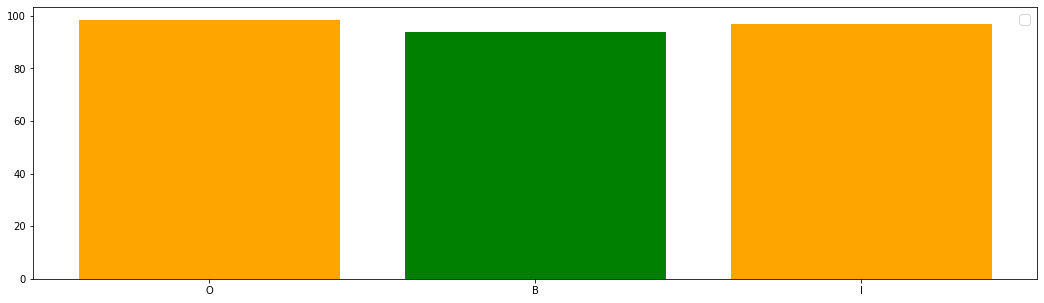

In [214]:
import matplotlib.pylab as plt
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(tag_ac.keys(), tag_ac.values(), color=['orange','green'],align='center')
ax.legend(fontsize = 14)

In [215]:
#tagged_seq_collection is a list of tagged_sequences of each fold
#test_seq_collection is a list of test_seq of each fold
print(len(tagged_seq_collection))
print(len(test_seq_collection))

5
5


In [216]:
#Extracting the Tagged Sequences and Test Sequences of the maximum fold
tseq=[]
tset=[]
for i in range(0,len(test_seq_collection[F])):
    for j in range(0,len(test_seq_collection[F][i])):
        tset.append((test_seq_collection[F][i][j][1]))

In [217]:
for i in range(0,len(tagged_seq_collection[F])):
        tseq.append((tagged_seq_collection[F][i][1]))

In [218]:
len(tseq),len(tset)

(3518, 3518)

In [219]:
#Storing allocated tags in list ltseq
ltseq=tseq

In [220]:
#Storing  Actual tags of test_set in list ltset
ltset=tset

In [221]:
ltseq

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

In [222]:
ltset

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

In [223]:
#Ultseq is list of unique tags present in the ltseq
#Ultset is list of unique tags present in the ltset
Ultset=list(set(ltset))
Ultseq=list(set(ltseq))
max(len(Ultset),len(Ultseq))

3

In [224]:
Ultset

['O', 'B', 'I']

In [225]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
y_true = ltset
y_pred = ltseq
array=confusion_matrix(y_true, y_pred)
array

array([[  75,    0,   32],
       [   0,   31,   22],
       [   5,    1, 3352]], dtype=int64)

<AxesSubplot:>

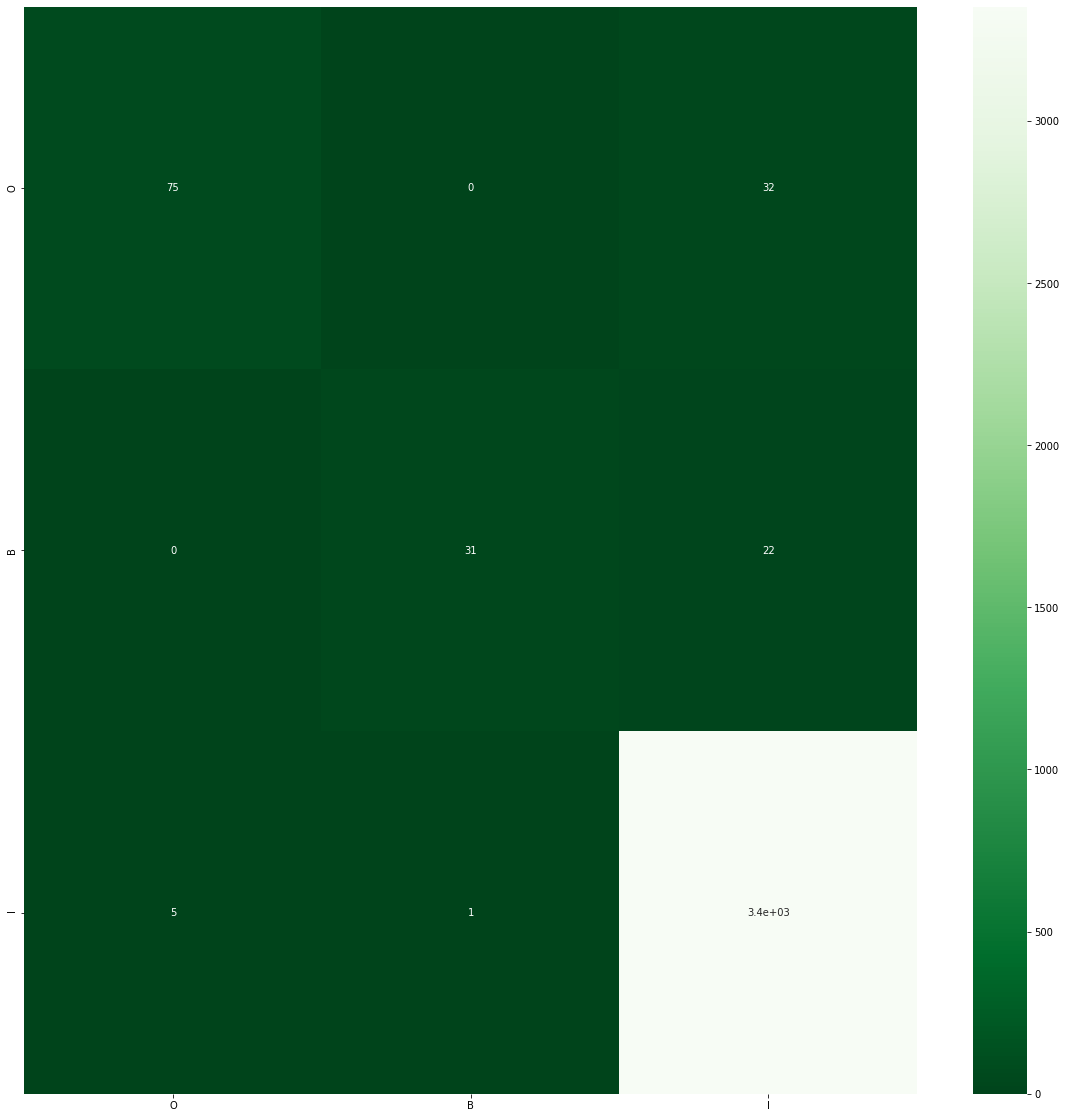

In [226]:
df_cm = pd.DataFrame(array, index = [i for i in Ultset],columns = [i for i in Ultset])
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, annot=True,cmap='Greens_r')

In [227]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.70      0.80       107
           I       0.97      0.58      0.73        53
           O       0.98      1.00      0.99      3358

    accuracy                           0.98      3518
   macro avg       0.96      0.76      0.84      3518
weighted avg       0.98      0.98      0.98      3518



#### We will now feed the NER-Dataset--TestSet.csv into our model.

In [228]:
dafra=pd.read_csv("NER-Dataset--TestSet.csv")

In [229]:
dafra.head()

,@SammieLynnsMom
0,@tg1.781
1,they
2,will
3,be
4,all


In [230]:
dafra.shape

(1891, 1)

In [231]:
dafra.isnull().sum()

@SammieLynnsMom    0
dtype: int64

In [232]:
dafralist=[]
for i in range(0,1891):
    dafralist.append(dafra["@SammieLynnsMom"][i])

In [233]:
len(dafralist)

1891

In [234]:
start = time.time()
Test_data_tagged_seq = Viterbi_Algorithm(dafralist)
end = time.time()
difference = end-start
print("Time Taken :",difference)

Time Taken : 42.31567621231079


In [235]:
Test_data_tagged_seq

[('@tg1.781', 'O'),
 ('they', 'O'),
 ('will', 'O'),
 ('be', 'O'),
 ('all', 'O'),
 ('done', 'O'),
 ('by', 'O'),
 ('Sunday', 'O'),
 ('trust', 'O'),
 ('me', 'O'),
 ('*wink*', 'O'),
 ('Made', 'O'),
 ('it', 'O'),
 ('back', 'O'),
 ('home', 'O'),
 ('to', 'O'),
 ('GA', 'B'),
 ('.', 'O'),
 ('It', 'O'),
 ('sucks', 'O'),
 ('not', 'O'),
 ('to', 'O'),
 ('be', 'O'),
 ('at', 'O'),
 ('Disney', 'B'),
 ('world', 'O'),
 (',', 'O'),
 ('but', 'O'),
 ('its', 'O'),
 ('good', 'O'),
 ('to', 'O'),
 ('be', 'O'),
 ('home', 'O'),
 ('.', 'O'),
 ('Time', 'O'),
 ('to', 'O'),
 ('start', 'O'),
 ('planning', 'O'),
 ('the', 'O'),
 ('next', 'O'),
 ('Disney', 'B'),
 ('World', 'O'),
 ('trip', 'O'),
 ('.', 'O'),
 ("'", 'O'),
 ('Breaking', 'O'),
 ('Dawn', 'O'),
 ("'", 'O'),
 ('Returns', 'O'),
 ('to', 'O'),
 ('Vancouver', 'O'),
 ('on', 'O'),
 ('January', 'O'),
 ('11th', 'O'),
 ('http://bit.ly/dbDMs8', 'O'),
 ('@ls_n', 'O'),
 ('perhaps', 'O'),
 (',', 'O'),
 ('but', 'O'),
 ('folks', 'O'),
 ('may', 'O'),
 ('find', 'O'),
 ('someth